In [26]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Assignment - Basic Predictions and Regression

## Regression

<b>Use the data provided to try to predict the wage_eur target varaible. </b>

The data is from FIFA rankings for players. You don't need to know anything about soccer or video games for this, so if these values are meaningless to you, just treat them as numbers and you'll be fine. All of the features are rankings are evaluations of how good different soccar players are at different skills.

#### Answer in English

Please fill in (and extend if required) the list here to explain what you did. There are multiple reasonable things you could do to approach this, so please note what you did here. For most people I assume this will be about 3-5 statements - you don't need to explain the internals of things we covered (e.g. if there's a hypothesis test, you don't need to explain how that works), just how you structured your approach to the problem. 

<ul>
<li>
<li>
<li>
</ul>

In [27]:
df = pd.read_csv("players_20_2.csv")
df.head()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,565000,88,95,70,92,88,97,93,94,92,...,94,48,40,94,94,75,96,33,37,26
1,405000,84,94,89,83,87,89,81,76,77,...,93,63,29,95,82,85,95,28,32,24
2,290000,87,87,62,87,87,96,88,87,81,...,84,51,36,87,90,90,94,27,26,29
3,125000,13,11,15,43,13,12,13,14,40,...,12,34,19,11,65,11,68,27,12,18
4,470000,81,84,61,89,83,95,83,79,83,...,80,54,41,87,89,88,91,34,27,22


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wage_eur,18278.0,9456.942773,21351.714095,0.0,1000.0,3000.0,8000.0,565000.0
attacking_crossing,18278.0,49.718405,18.325403,5.0,38.0,54.0,64.0,93.0
attacking_finishing,18278.0,45.590218,19.594609,2.0,30.0,49.0,62.0,95.0
attacking_heading_accuracy,18278.0,52.221468,17.428429,5.0,44.0,56.0,64.0,93.0
attacking_short_passing,18278.0,58.748003,14.679653,7.0,54.0,62.0,68.0,92.0
attacking_volleys,18278.0,42.809388,17.701815,3.0,30.0,44.0,56.0,90.0
skill_dribbling,18278.0,55.596509,18.929118,4.0,50.0,61.0,68.0,97.0
skill_curve,18278.0,47.325692,18.422991,6.0,34.0,49.0,62.0,94.0
skill_fk_accuracy,18278.0,42.708885,17.433612,4.0,31.0,41.0,56.0,94.0
skill_long_passing,18278.0,52.768848,15.246454,8.0,43.0,56.0,64.0,92.0


In [29]:
#sns.pairplot(df.sample(100))

<AxesSubplot:xlabel='wage_eur', ylabel='Density'>

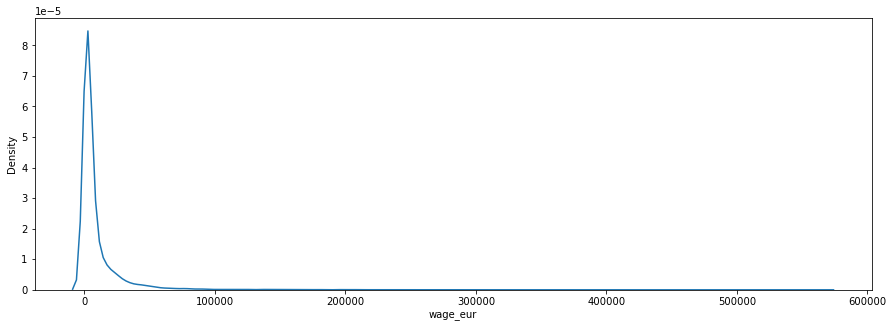

In [30]:
sns.kdeplot(df["wage_eur"])

/Users/akeems/opt/anaconda3/envs/ml3950/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='wage_eur', ylabel='Density'>

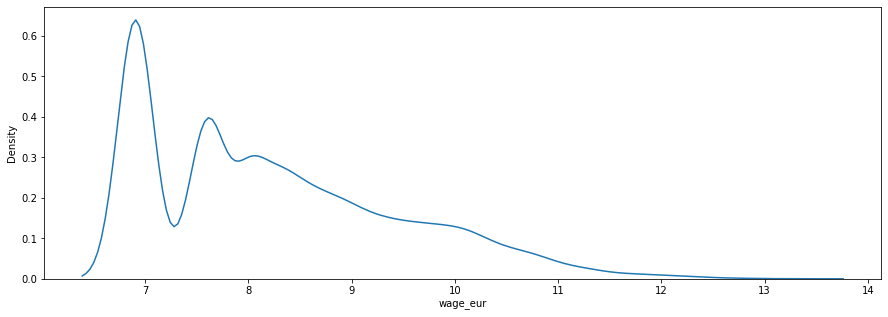

In [31]:
sns.kdeplot(np.log(df["wage_eur"]))

#### Clean some data

In [32]:
df.isnull().sum().sort_values(ascending=False)

wage_eur                      0
attacking_crossing            0
defending_standing_tackle     0
defending_marking             0
mentality_composure           0
mentality_penalties           0
mentality_vision              0
mentality_positioning         0
mentality_interceptions       0
mentality_aggression          0
power_long_shots              0
power_strength                0
power_stamina                 0
power_jumping                 0
power_shot_power              0
movement_balance              0
movement_reactions            0
movement_agility              0
movement_sprint_speed         0
movement_acceleration         0
skill_ball_control            0
skill_long_passing            0
skill_fk_accuracy             0
skill_curve                   0
skill_dribbling               0
attacking_volleys             0
attacking_short_passing       0
attacking_heading_accuracy    0
attacking_finishing           0
defending_sliding_tackle      0
dtype: int64

In [33]:
df2 = df[df["wage_eur"] > 10]
df2 = df[df["wage_eur"] < 300000]
y = np.array(df2["wage_eur"]).reshape(-1,1)
x = np.array(df2.drop(columns={"wage_eur"}))
print(x.shape, y.shape)

scaler = MinMaxScaler()
xTrain_, xTest_, yTrain, yTest = train_test_split(x,y)

xTrain = scaler.fit_transform(xTrain_)
xTest = scaler.transform(xTest_)

model = LinearRegression().fit(xTrain, yTrain)
preds = model.predict(xTest)
r2 = model.score(xTest, yTest)
rmse = mean_squared_error(yTest, preds, squared=False)
print("RMSE:", rmse, "\nR2:", r2)

(18267, 29) (18267, 1)
RMSE: 15668.852083273528 
R2: 0.3012714573481525


#### Examine Colinerarity

In [34]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Function will check the VIF of each variable in a DF and return the results in another DF
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

#Check VIFs
vifs_1 = calc_vif(df2).sort_values(by="VIF", ascending=False)
vifs_1

,variables,VIF
10,skill_ball_control,258.893158
4,attacking_short_passing,227.973333
11,movement_acceleration,177.023852
28,defending_standing_tackle,165.746011
6,skill_dribbling,164.837693
12,movement_sprint_speed,149.291715
29,defending_sliding_tackle,135.196516
14,movement_reactions,107.319123
13,movement_agility,97.179914
9,skill_long_passing,96.094741


In [35]:
cols_rem_1 = vifs_1["variables"].to_list()
cols_rem_1

['skill_ball_control',
 'attacking_short_passing',
 'movement_acceleration',
 'defending_standing_tackle',
 'skill_dribbling',
 'movement_sprint_speed',
 'defending_sliding_tackle',
 'movement_reactions',
 'movement_agility',
 'skill_long_passing',
 'mentality_composure',
 'power_shot_power',
 'mentality_positioning',
 'attacking_finishing',
 'mentality_interceptions',
 'power_long_shots',
 'mentality_vision',
 'movement_balance',
 'power_stamina',
 'power_strength',
 'skill_curve',
 'attacking_crossing',
 'mentality_penalties',
 'attacking_heading_accuracy',
 'defending_marking',
 'attacking_volleys',
 'power_jumping',
 'mentality_aggression',
 'skill_fk_accuracy',
 'wage_eur']

In [36]:
df2_filt_1 = df2.drop(columns=cols_rem_1[0:7])
df2_filt_1.head()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,movement_agility,movement_reactions,...,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking
2,290000,87,87,62,87,88,87,81,96,92,...,81,49,84,51,36,87,90,90,94,27
3,125000,13,11,15,13,13,14,40,67,88,...,41,78,12,34,19,11,65,11,68,27
6,250000,18,14,11,14,18,12,63,37,86,...,35,78,10,43,22,11,70,25,70,25
7,200000,53,52,86,45,60,70,81,61,88,...,75,92,64,82,89,47,65,62,89,91
9,240000,79,90,59,79,83,69,75,91,92,...,85,73,84,63,55,92,84,77,91,38


In [37]:
y1 = np.array(df2_filt_1["wage_eur"]).reshape(-1,1)
x1 = np.array(df2_filt_1.drop(columns={"wage_eur"}))

xTrain_1, xTest_1, yTrain1, yTest1 = train_test_split(x1,y1)

xTrain1 = scaler.fit_transform(xTrain_1)
xTest1 = scaler.transform(xTest_1)

model1 = LinearRegression().fit(xTrain1, yTrain1)
preds1 = model1.predict(xTest1)
r21 = model1.score(xTest1, yTest1)
rmse1 = mean_squared_error(yTest1, preds1, squared=False)
print("RMSE:", rmse1, "\nR2:", r21)


RMSE: 15364.733310432943 
R2: 0.29910622360943695


In [38]:
#sns.pairplot(df2_filt_1.sample(100))

With collinearity and log transform

In [39]:
df2_filt_1["wage_eur2"] = df2_filt_1["wage_eur"] + 1
y2 = np.array(np.log(df2_filt_1["wage_eur2"])).reshape(-1,1)
x2 = np.array(df2_filt_1.drop(columns={"wage_eur", "wage_eur2"}))

xTrain2, xTest2, yTrain2, yTest2 = train_test_split(x2,y2)

model2 = LinearRegression().fit(xTrain2, yTrain2)
preds2 = model2.predict(xTest2)
r22 = model2.score(xTest2, yTest2)
rmse2 = mean_squared_error(yTest2, preds2, squared=False)
print("RMSE:", rmse2, "\nR2:", r22)

RMSE: 1.3253249266156093 
R2: 0.29125494695992493
